In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return X, y

In [3]:
X, y = devil(300)

In [4]:
X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)

In [5]:
# Отрисовочная магия
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

x_min, x_max = (-1, 1)
y_min, y_max = (-1, 1)

h = 0.05

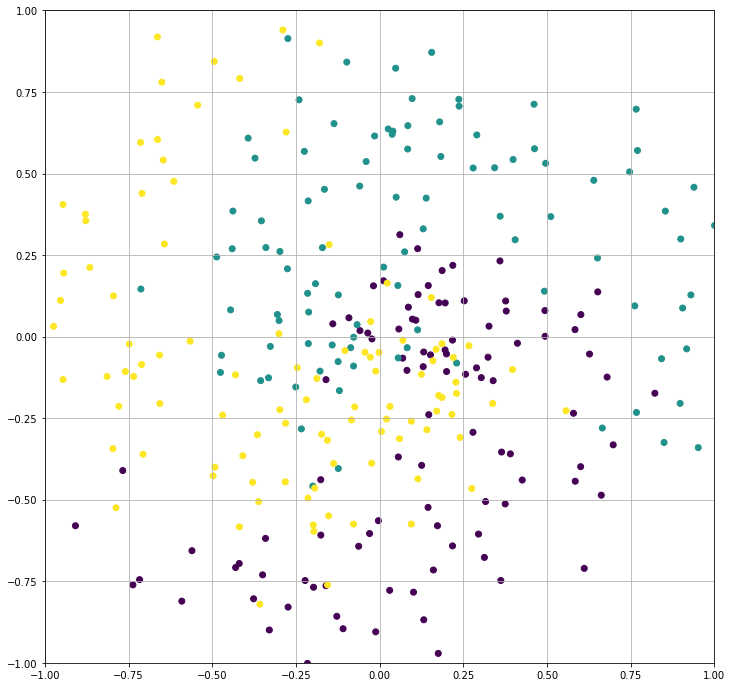

In [6]:
plt.figure(figsize=(12, 12))

plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.6)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

Процент правильно угаданных ответов на обучающем множестве: 0.7722222222222223
Процент правильно угаданных ответов на тестовом множестве: 0.7583333333333333


<ipython-input-12-841f644086ac>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


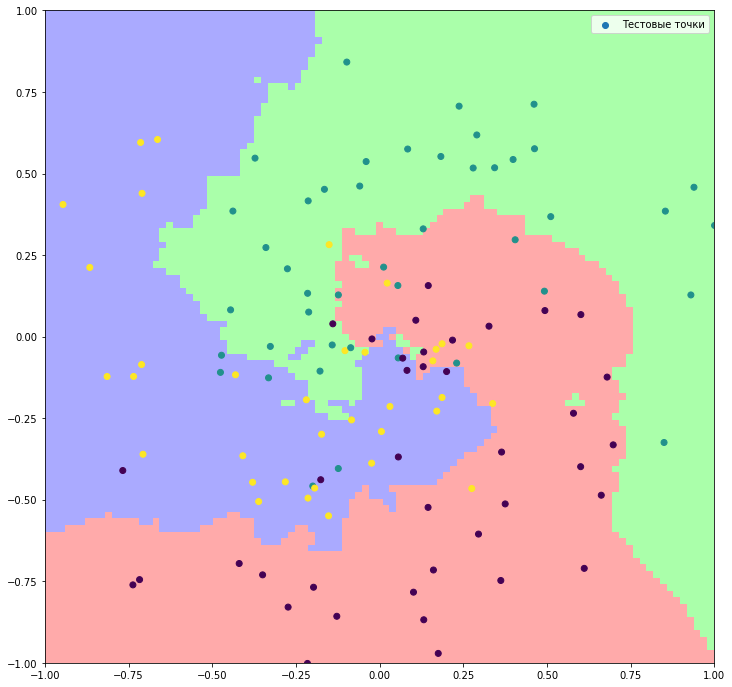

In [12]:
plt.figure(figsize=(12, 12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тестовые точки')

plt.legend()

plt.show()

Процент правильно угаданных ответов на обучающем множестве: 1.0
Процент правильно угаданных ответов на тестовом множестве: 0.7166666666666667


<ipython-input-13-64998216d4b2>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


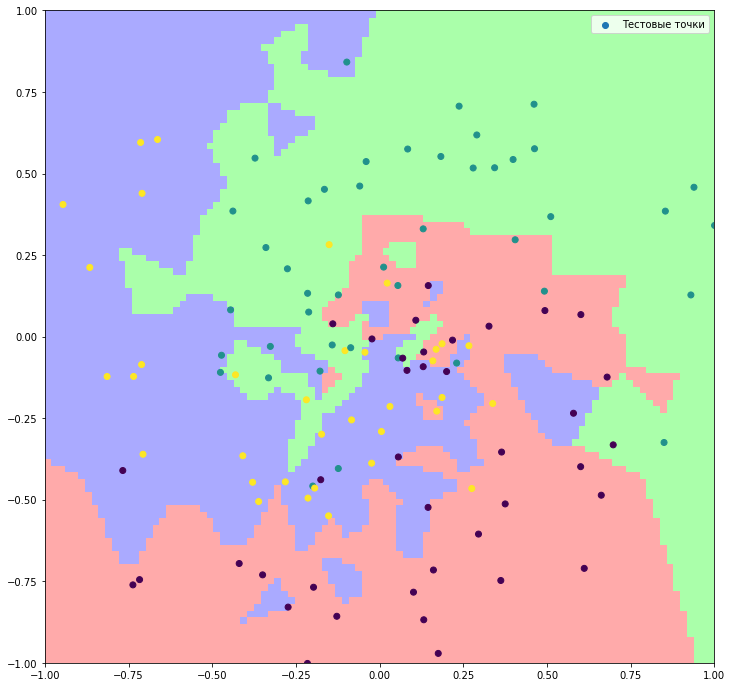

In [13]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

plt.figure(figsize=(12, 12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тестовые точки')

plt.legend()

plt.show()